In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib

from community import community_louvain
import seaborn as sns
from termcolor import colored
from sklearn import preprocessing
from sklearn.cluster import KMeans

import networkx as nx
from networkx.algorithms import bipartite
from networkx.algorithms.community import label_propagation_communities

In [ ]:
dt=pd.read_csv("/content/airline_tonghop.csv", encoding="ISO-8859-1")
dt.dropna()
dt.drop_duplicates()
dt

,Airline,DestinationCountry
0,Air France,United States
1,Air France,Cote d'Ivoire
2,Air France,United States
3,Air France,Nigeria
4,Air France,Nigeria
...,...,...
6135,Virgin Atlantic Airlines,United States
6136,Virgin Atlantic Airlines,Saint Lucia
6137,Virgin Atlantic Airlines,Saint Lucia
6138,Virgin Atlantic Airlines,Saint Lucia


In [ ]:
B = nx.Graph()
Airline = dt['Airline']
DestinationCountry = dt['DestinationCountry']
print('Số chuyến bay', Airline.nunique())
print('Số điểm đến', DestinationCountry.nunique())
print('Số cạnh', len(dt))

Số chuyến bay 15
Số điểm đến 185
Số cạnh 6140


In [ ]:
for index, row in dt.iterrows():B.add_edge(row['Airline'], row['DestinationCountry'], weight=1)
B.add_nodes_from(DestinationCountry,bipartite=0)
B.add_nodes_from(Airline,bipartite=1)

<Figure size 1200x1200 with 0 Axes>

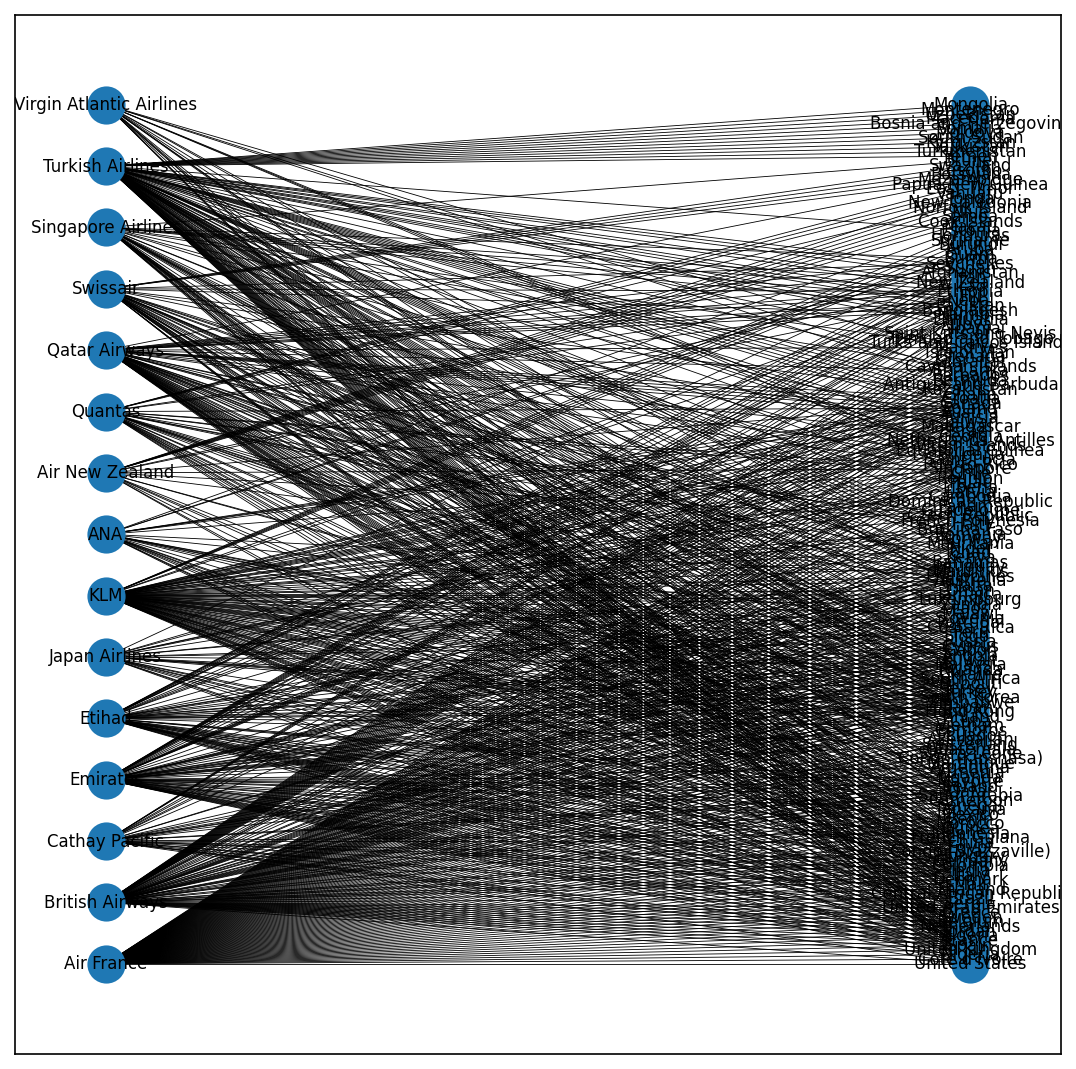

In [ ]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(B)
fig, ax = plt.subplots(1,1,figsize=(9,9), dpi=150)
nx.draw_networkx(B, pos = nx.drawing.layout.bipartite_layout(B, Airline),font_size=8,width=0.4)

In [ ]:
# # Check for duplicate nodes
# if len(set(DestinationCountry)) != len(DestinationCountry):
#     raise ValueError("Duplicate nodes found in DestinationCountry.")

# # Check if DestinationCountry is a subset of the bipartite graph
# if not set(DestinationCountry).issubset(set(B.nodes)):
#     raise ValueError("DestinationCountry is not a subset of the bipartite graph.")

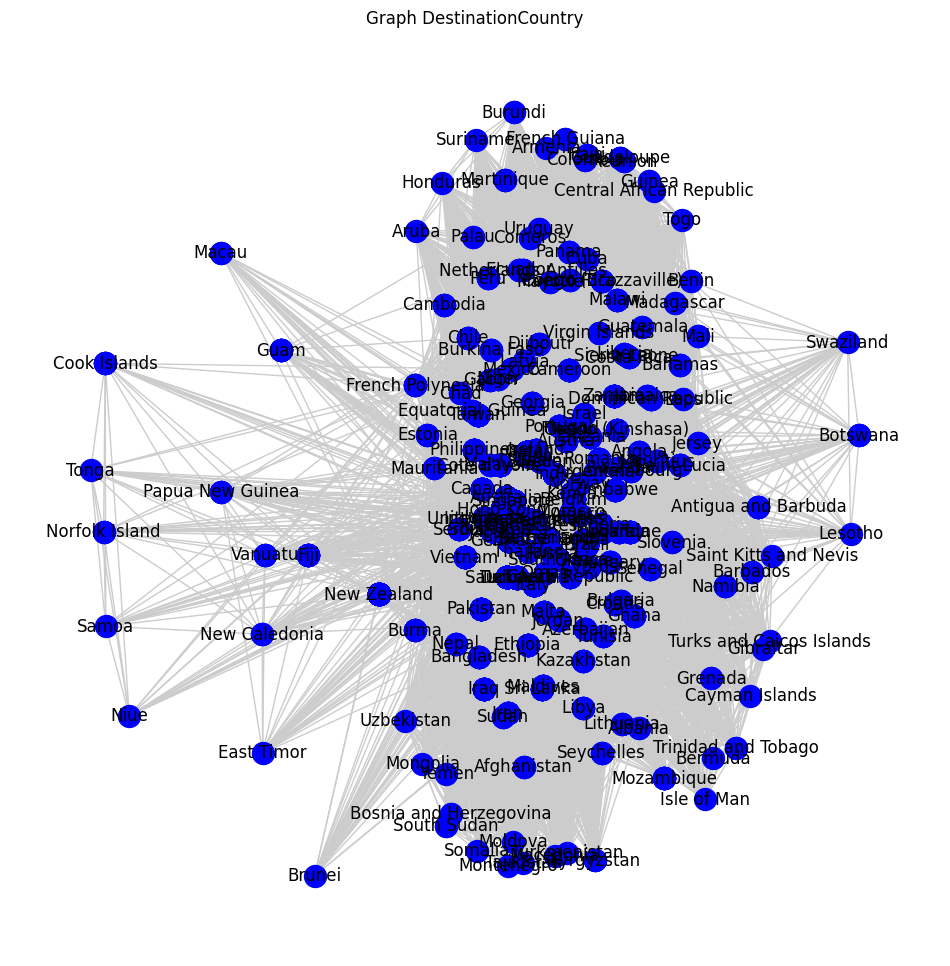

In [ ]:
G = bipartite.weighted_projected_graph(B, list(set(DestinationCountry)))  # Remove duplicates using set
plt.figure(figsize=(12,12))

layout = nx.spring_layout(G)

nx.draw_networkx_nodes(G, layout,nodelist=DestinationCountry,node_size=250,node_color='blue')
nx.draw_networkx_edges(G, layout, edge_color='#cccccc')
node_labels = dict(zip(DestinationCountry, DestinationCountry))
nx.draw_networkx_labels(G, layout, labels=node_labels)
plt.axis('off')

plt.title("Graph DestinationCountry")

plt.show()

In [ ]:
labels = nx.get_edge_attributes(G, 'weight')
df2 = pd.DataFrame(columns=['source', 'target', 'weight'])
for key, value in labels.items():
    df2 = df2.append({'source':key[0], 'target':key[1], 'weight':value}, ignore_index=True)
    df2.to_csv (r'gelphi.csv', index = False, header=True)

In [ ]:
df = pd.read_csv('gelphi.csv', usecols=['source', 'target'])
df.dropna()
df.drop_duplicates()
df

,source,target
0,Bangladesh,Switzerland
1,Bangladesh,South Sudan
2,Bangladesh,Ethiopia
3,Bangladesh,Malta
4,Bangladesh,Argentina
...,...,...
12255,Mayotte,Bulgaria
12256,Mayotte,Burundi
12257,Bulgaria,Turks and Caicos Islands
12258,Bulgaria,Grenada


In [ ]:
G = nx.Graph()

edges = df[['source', 'target']]
G = nx.from_pandas_edgelist(edges, 'source', 'target')

print('Số đỉnh: ', len(G.nodes()))
print('Số cạnh: ', len(G.edges()))

Số đỉnh:  185
Số cạnh:  12260


In [ ]:
print('Kiểm tra đồ thị liên thông: ')
nx.is_connected(G)

Kiểm tra đồ thị liên thông: 


True

/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:437: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


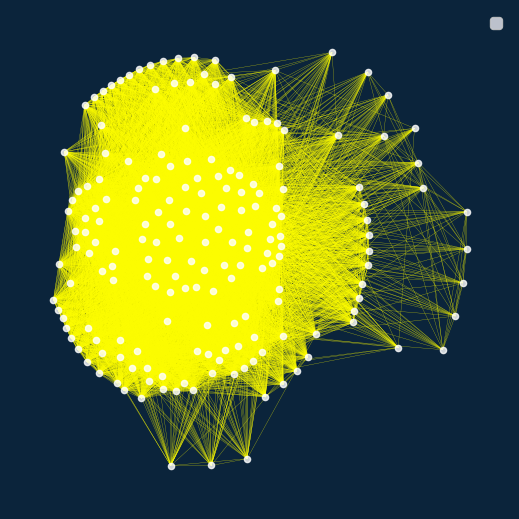

In [ ]:
# %load_ext autotime
# nx.draw_networkx(G)

pd.option_context('precision',10)

nodes = G.nodes()
degree = G.degree()
colors = [degree[n] for n in nodes]

pos = nx.kamada_kawai_layout(G)

cmap = plt.cm.viridis_r
cmap = plt.cm.Greys

vmin = min(colors)
vmax = max(colors)

fig = plt.figure(figsize = (5,5), dpi=100)

nx.draw(G,pos,alpha = 0.8, nodelist = nodes, node_color = 'w', node_size = 20, with_labels= False,font_size = 6, width = 0.2, cmap = cmap, edge_color ='yellow')
fig.set_facecolor('#0B243B')

plt.legend()
plt.show()



# **Degree Centrality**



In [ ]:
def print_table(data, columns):
  df = pd.DataFrame(data, columns=columns)
  return df

degree_dict = { node: 0 for node in G.nodes() }

for node in G.nodes():
  degree_dict[node] = len(list(G.neighbors(node)))

degree_df = print_table(degree_dict.items(), ['Node', 'Degree'])

print('Degree of each node \n')
# degree_df = degree_df.sort_values(by='Degree', ascending=False)
degree_df

Degree of each node 



,Node,Degree
0,Bangladesh,118
1,Switzerland,179
2,South Sudan,104
3,Ethiopia,145
4,Malta,162
...,...,...
180,Niue,20
181,Samoa,20
182,Norfolk Island,20
183,Cook Islands,20


Biểu đồ thể hiện giá trị bậc của các node trong graph


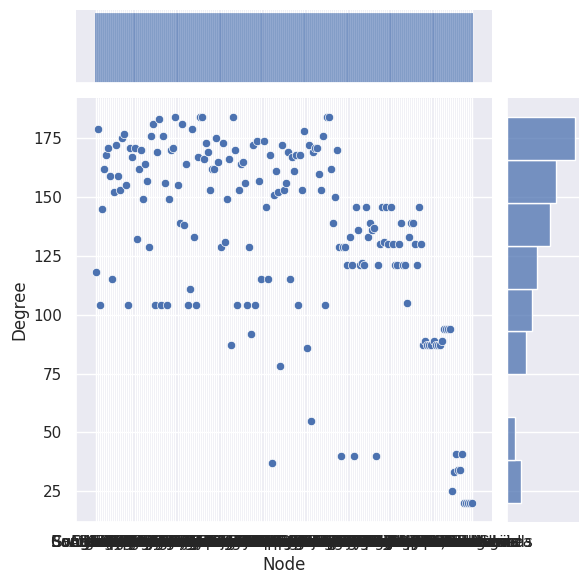

In [ ]:
print(colored("Biểu đồ thể hiện giá trị bậc của các node trong graph", 'green', attrs=['bold']))
sns.jointplot(x="Node", y="Degree", data=degree_df)

Biểu đồ thể hiện phân bố bậc của các node trong graph


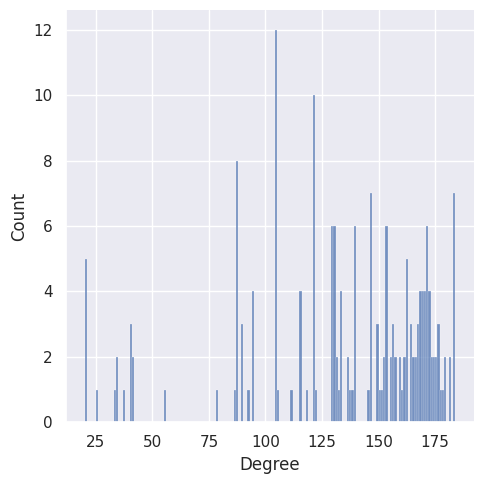

In [ ]:
print(colored("Biểu đồ thể hiện phân bố bậc của các node trong graph", 'green', attrs=['bold']))
sns.displot(x="Degree", data=degree_df, binwidth=1)

In [ ]:
print('Top 10 node có bậc cao nhất : ')
# print_table(top_10_max_degree, ['Node', 'Degree'])
degree_df.head(10)

Top 10 node có bậc cao nhất : 


,Node,Degree
52,Singapore,184
51,Hong Kong,184
113,Germany,184
39,United Arab Emirates,184
114,United Kingdom,184
67,United States,184
31,Australia,183
42,China,181
28,Japan,181
47,Thailand,179


In [ ]:
print('Top 10 node có bậc thấp nhất : ')
degree_df = degree_df.sort_values(by='Degree', ascending=True)
degree_df.head(10)

Top 10 node có bậc thấp nhất : 


,Node,Degree
184,Tonga,20
180,Niue,20
183,Cook Islands,20
182,Norfolk Island,20
181,Samoa,20
174,Macau,25
175,Guam,33
178,Papua New Guinea,34
177,East Timor,34
86,Brunei,37


In [ ]:
deg_cen = nx.degree_centrality(G) # return a dictionary
deg_cen_df = print_table(deg_cen.items(), ['Destination Country', 'Degree centrality'])

print("Degree Centrality of each country \n")
deg_cen_df

Degree Centrality of each country 



,Destination Country,Degree centrality
0,Bangladesh,0.6413043478
1,Switzerland,0.9728260870
2,South Sudan,0.5652173913
3,Ethiopia,0.7880434783
4,Malta,0.8804347826
...,...,...
180,Niue,0.1086956522
181,Samoa,0.1086956522
182,Norfolk Island,0.1086956522
183,Cook Islands,0.1086956522


In [ ]:
deg_cen_df.to_csv (r'degree_gelphi.csv', index = False, header=True)

Biểu đồ thể hiện giá trị bậc của các node trong graph


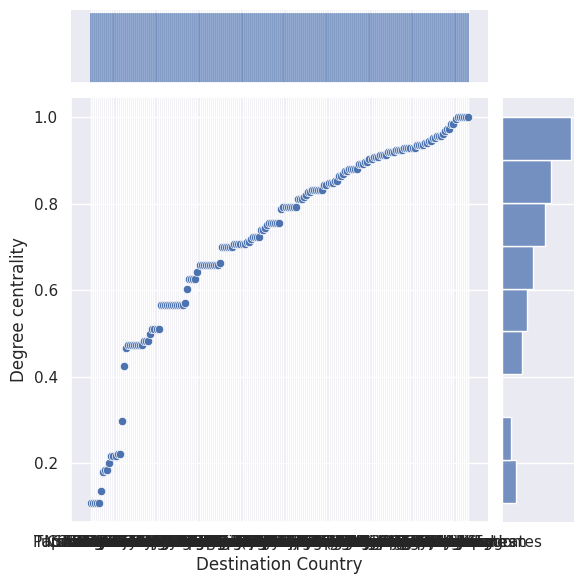

In [ ]:
print(colored("Biểu đồ thể hiện giá trị bậc của các node trong graph", 'green', attrs=['bold']))
sns.jointplot(x="Destination Country", y="Degree centrality", data=deg_cen_df)

Biểu đồ thể hiện phân bố Eigenvector Centrality của các node trong graph


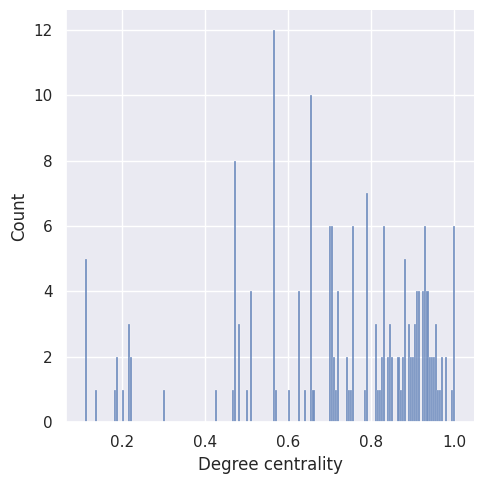

In [ ]:
print(colored("Biểu đồ thể hiện phân bố Degree Centrality của các node trong graph", 'green', attrs=['bold']))
sns.displot(x="Degree centrality", data=deg_cen_df, binwidth=0.005)

In [ ]:
print('Top 6 quốc gia có Degree centrality cao nhất: ')
deg_cen_df = deg_cen_df.sort_values(by='Degree centrality', ascending=False)
deg_cen_df.head(6)

Top 6 quốc gia có Degree centrality cao nhất: 


,Destination Country,Degree centrality
52,Singapore,1.0
51,Hong Kong,1.0
113,Germany,1.0
39,United Arab Emirates,1.0
114,United Kingdom,1.0
67,United States,1.0


In [ ]:
print('Top 5 quốc gia có Degree centrality thấp nhất: ')
deg_cen_df = deg_cen_df.sort_values(by='Degree centrality', ascending=True)
deg_cen_df.head(5)

Top 5 quốc gia có Degree centrality thấp nhất: 


,Destination Country,Degree centrality
184,Tonga,0.1086956522
180,Niue,0.1086956522
183,Cook Islands,0.1086956522
182,Norfolk Island,0.1086956522
181,Samoa,0.1086956522


# **Eigenvector Centrality**

In [ ]:
eig_cen = nx.eigenvector_centrality(G, max_iter=100)
eig_cen_df = print_table(eig_cen.items(), ['Destination Country', 'Eigenvector Centrality'])
eig_cen_df

,Destination Country,Eigenvector Centrality
0,Bangladesh,0.0643092673
1,Switzerland,0.0892851397
2,South Sudan,0.0583541646
3,Ethiopia,0.0767084488
4,Malta,0.0856411851
...,...,...
180,Niue,0.0082369362
181,Samoa,0.0082369362
182,Norfolk Island,0.0082369362
183,Cook Islands,0.0082369362


In [ ]:
eig_cen_df.to_csv (r'eigenvector_gelphi.csv', index = False, header=True)

Biểu đồ thể hiện giá trị Eigenvector centrality của các node trong graph


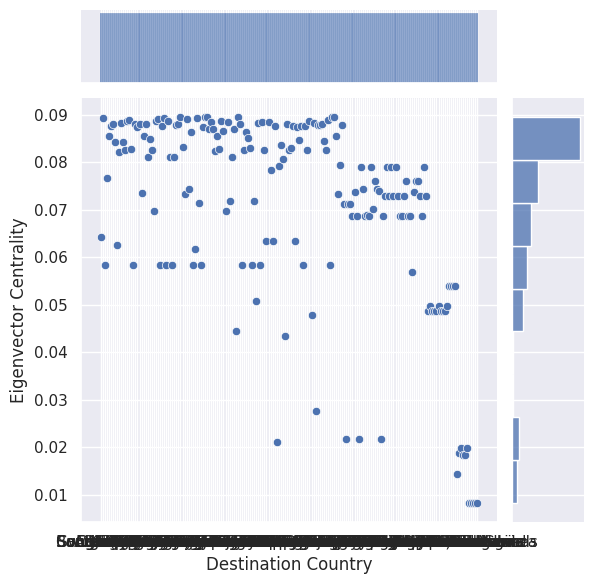

In [ ]:
print(colored("Biểu đồ thể hiện giá trị Eigenvector centrality của các node trong graph", 'green', attrs=['bold']))
sns.jointplot(x="Destination Country", y="Eigenvector Centrality", data=eig_cen_df)

Biểu đồ thể hiện phân bố Eigenvector Centrality của các node trong graph


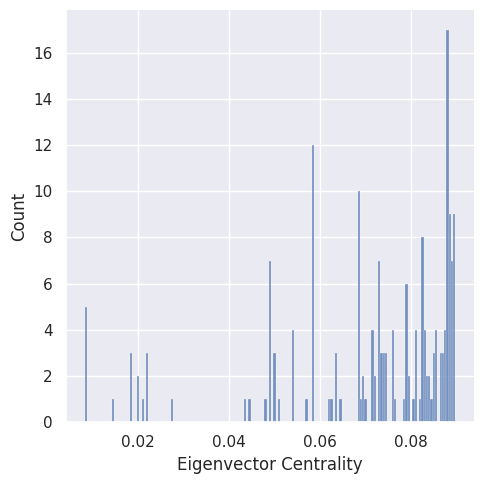

In [ ]:
print(colored("Biểu đồ thể hiện phân bố Eigenvector Centrality của các node trong graph", 'green', attrs=['bold']))
sns.displot(x="Eigenvector Centrality", data=eig_cen_df, binwidth=0.0005)

In [ ]:
print('Top 6 quốc gia có Eigenvector Centrality lớn nhất: ')
eig_cen_df = eig_cen_df.sort_values(by='Eigenvector Centrality', ascending=False)
eig_cen_df.head(6)

Top 6 quốc gia có Eigenvector Centrality lớn nhất: 


,Destination Country,Eigenvector Centrality
52,Singapore,0.0895678878
51,Hong Kong,0.0895678878
114,United Kingdom,0.0895678878
113,Germany,0.0895678878
67,United States,0.0895678878
39,United Arab Emirates,0.0895678878


In [ ]:
print('Top 5 quốc gia có Eigenvector Centrality nhỏ nhất: ')
eig_cen_df = eig_cen_df.sort_values(by='Eigenvector Centrality', ascending=True)
eig_cen_df.head(5)

Top 5 quốc gia có Eigenvector Centrality nhở nhất: 


,Destination Country,Eigenvector Centrality
184,Tonga,0.0082369362
180,Niue,0.0082369362
183,Cook Islands,0.0082369362
182,Norfolk Island,0.0082369362
181,Samoa,0.0082369362


# **PageRank**

In [ ]:
pagerank = nx.pagerank(G, tol=1e-6, alpha=0.85)
pagerank_df = print_table(pagerank.items(), ['Destination Country', 'Pagerank'])
pagerank_df

,Destination Country,Pagerank
0,Bangladesh,0.0048710391
1,Switzerland,0.0071438780
2,South Sudan,0.0043516300
3,Ethiopia,0.0058303464
4,Malta,0.0063771997
...,...,...
180,Niue,0.0017059252
181,Samoa,0.0017059252
182,Norfolk Island,0.0017059252
183,Cook Islands,0.0017059252


In [ ]:
pagerank_df.to_csv (r'pagerank_gelphi.csv', index = False, header=True)

Biểu đồ thể hiện giá trị pagerank của các node trong graph


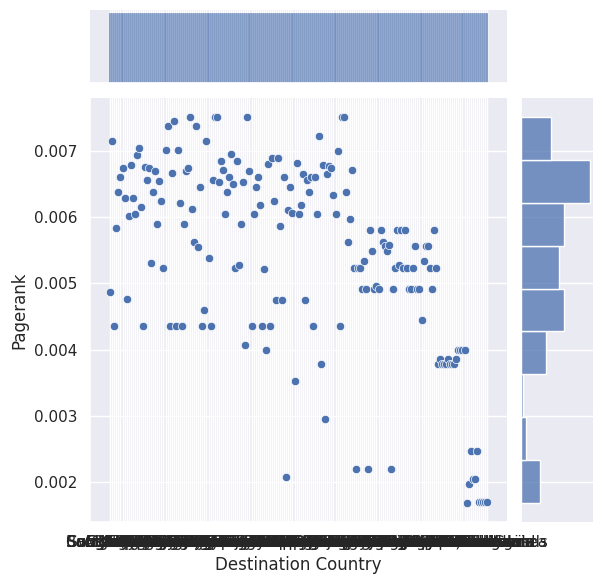

In [ ]:
print(colored("Biểu đồ thể hiện giá trị pagerank của các node trong graph", 'green', attrs=['bold']))
sns.jointplot(x="Destination Country", y="Pagerank", data=pagerank_df)

Biểu đồ thể hiện phân bố pagerank của các node trong graph


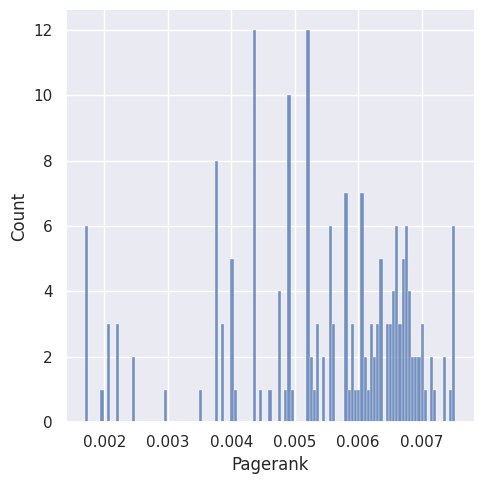

In [ ]:
print(colored("Biểu đồ thể hiện phân bố pagerank của các node trong graph", 'green', attrs=['bold']))
sns.displot(x="Pagerank", data=pagerank_df,binwidth=0.00005)

In [ ]:
print('Top 6 quốc gia có Pagerank lớn nhất \n')
pagerank_df = pagerank_df.sort_values(by='Pagerank', ascending=False)
pagerank_df.head(6)

Top 6 quốc gia có Pagerank lớn nhất 



,Destination Country,Pagerank
67,United States,0.0075059055
39,United Arab Emirates,0.0075059055
51,Hong Kong,0.0075059055
52,Singapore,0.0075059055
114,United Kingdom,0.0075059055
113,Germany,0.0075059055


In [ ]:
print('Quốc gia có Pagerank nhỏ nhất \n')
pagerank_df = pagerank_df.sort_values(by='Pagerank', ascending=True)
pagerank_df.head(1)

Quốc gia có Pagerank nhỏ nhất 



,Destination Country,Pagerank
174,Macau,0.0016853291
